# This notebook contains the code for plotting the Dissolved Oxygen Commissioning plots

### Two new dissolved oxygen instruments were purchased from Scripps - these new instruments were subsequently taken on in2020_e01 for commissioning. The data below was collected on the voyage where all 3 instruments (2 new, 1 old) were setup in the same laboratory space and operated in parallel.

#### Imports and style sets:

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import seawater as sw
import scipy.stats as sci_st

sns.set(style="whitegrid") # I like this
mpl.rc('font', family='serif') # Cast Segoe UI font onto all plot text
mpl.rc('figure', figsize=[8, 5]) # Set fig size to something more fitting for A4 word doc

---

## 1.1 Independent Iodate Standards

In [4]:
iodate_df = pd.read_csv(r"C:\Users\she384\Documents\DO Commissioning\repo\data\independent_iodate.csv")

In [6]:
iodate_df.head()

,Instrument,Bottle,FlaskVol,RawTitre,Titre20,O2ml/L,ThioTemp,DrawTemp,EndVolts,TitreTime,O2µmol/L
0,New A,200,142.19,0.51524,0.51529,4.964,19.46,20,2.450,155700,221.5632
1,New A,200,142.19,0.51495,0.51496,4.960,19.86,20,2.412,160520,221.4292
2,New A,200,142.19,0.51513,0.51514,4.962,19.86,20,2.427,161045,221.5186
3,New A,200,142.19,0.51485,0.51486,4.959,19.91,20,2.424,161648,221.3846
4,New B,200,142.19,0.61870,0.61877,4.960,19.40,20,2.358,160025,221.5632


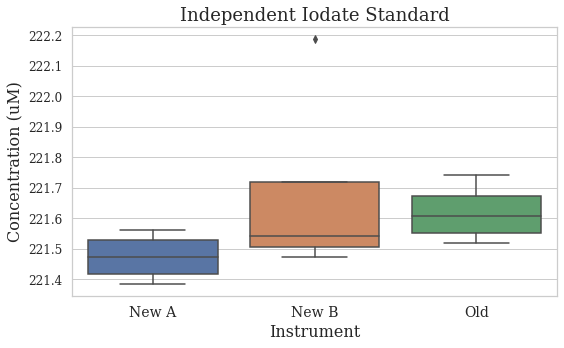

In [176]:
sns.boxplot(iodate_df['Instrument'], iodate_df['O2µmol/L'])

plt.xlabel("Instrument", fontsize=16)
plt.ylabel("Concentration (uM)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title('Independent Iodate Standard', fontsize=18)

plt.tight_layout()

# Comment or include next two lines if wanting to scale chart for all
#data_mean = iodate_df['O2µmol/L'].mean()
#plt.ylim(data_mean-2, data_mean+2)

plt.savefig('independent_iodate_standards.svg', format='svg')

---

## 1.2 Repeated Deep Sample Measurements: 1

### 1.2.1 Samples from One Niskin per Instrument

In [8]:
deep_reps_single_df = pd.read_csv(r"C:\Users\she384\Documents\DO Commissioning\repo\data\dep_1_deep_replicates_single_niskins.csv")

In [9]:
deep_reps_single_df.head()

,Instrument,Bottle,FlaskVol,RawTitre,Titre20,O2ml/L,ThioTemp,DrawTemp,EndVolts,TitreTime,O2µmol/L,RP
0,New A,143,145.25,0.44525,0.44526,4.195,19.88,6.7,2.423,162322,187.3082,4
1,New A,144,146.25,0.44776,0.44777,4.190,19.84,6.9,2.471,162637,187.0403,4
2,New A,148,143.04,0.43883,0.43884,4.199,19.90,7.1,2.405,163229,187.4869,4
3,New A,150,140.86,0.43107,0.43108,4.189,19.84,7.2,2.389,163558,187.0403,4
4,New A,152,145.03,0.44393,0.44395,4.189,19.82,7.4,2.393,163904,187.0403,4


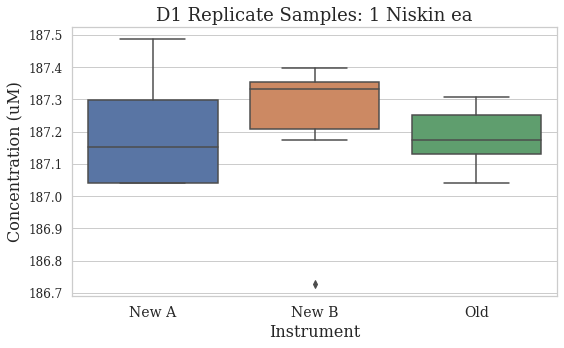

In [177]:
sns.boxplot(deep_reps_single_df['Instrument'], deep_reps_single_df['O2µmol/L'])

plt.xlabel("Instrument", fontsize=16)
plt.ylabel("Concentration (uM)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title('D1 Replicate Samples: 1 Niskin ea', fontsize=18)

plt.tight_layout()

# Comment or include next two lines if wanting to scale chart for all
#data_mean = deep_reps_single_df['O2µmol/L'].mean()
#plt.ylim(data_mean-2, data_mean+2)

plt.savefig('replicate_deep_samples_1_single.svg', format='svg')

### 1.2.2 Descriptive Statistics

In [201]:
deep_reps_single_df.groupby(['Instrument'])['O2µmol/L'].describe()

,count,mean,std,min,25%,50%,75%,max
Instrument,,,,,,,,
New A,6.0,187.196600,0.186819,187.0403,187.040300,187.15195,187.297050,187.4869
New B,6.0,187.218917,0.252660,186.7276,187.207775,187.33055,187.352900,187.3976
Old,6.0,187.181700,0.099515,187.0403,187.129600,187.17425,187.252425,187.3082


### 1.2.3 T-Test Comparison of Means

In [202]:
deep_reps_single_newa = deep_reps_single_df.loc[deep_reps_single_df['Instrument'] == 'New A']
deep_reps_single_newb = deep_reps_single_df.loc[deep_reps_single_df['Instrument'] == 'New B']
deep_reps_single_old = deep_reps_single_df.loc[deep_reps_single_df['Instrument'] == 'Old']

#### Compare New A to Old instrument

In [203]:
result = sci_st.ttest_ind(deep_reps_single_newa['O2µmol/L'], deep_reps_single_old['O2µmol/L'])
print(f'Comparison of the New A instrument to Old, p-value: {result[1]}')
if result[1] < 0.05:
    print('Significance !')

Comparison of the New A instrument to Old, p-value: 0.8665430859682957


#### Compare New B to Old instrument

In [204]:
result = sci_st.ttest_ind(deep_reps_single_newb['O2µmol/L'], deep_reps_single_old['O2µmol/L'])
print(f'Comparison of the New B instrument to Old, p-value: {result[1]}')
if result[1] < 0.05:
    print('Significance !')

Comparison of the New B instrument to Old, p-value: 0.7440286422028863


### 1.2.4 Samples from Two Niskins for all Instruments

In [24]:
deep_reps_shared_df = pd.read_csv(r"C:\Users\she384\Documents\DO Commissioning\repo\data\dep_1_deep_replicates_shared_niskins.csv")

In [25]:
deep_reps_shared_df.head()

,Instrument,Bottle,FlaskVol,RawTitre,Titre20,O2ml/L,ThioTemp,DrawTemp,EndVolts,TitreTime,O2µmol/L,RP
0,New A,161,144.68,0.44360,0.44343,4.195,21.84,7.0,2.074,232544,187.2636,5
1,New A,167,144.39,0.44349,0.44331,4.202,21.88,7.4,2.132,232834,187.6209,5
2,New A,211,144.58,0.44272,0.44254,4.189,21.95,7.2,2.137,233205,187.0403,6
3,New A,217,141.62,0.43344,0.43327,4.188,21.94,7.7,2.083,233501,186.9956,6
4,New B,162,145.50,0.53636,0.53638,4.199,19.81,7.2,2.270,233544,187.5762,5


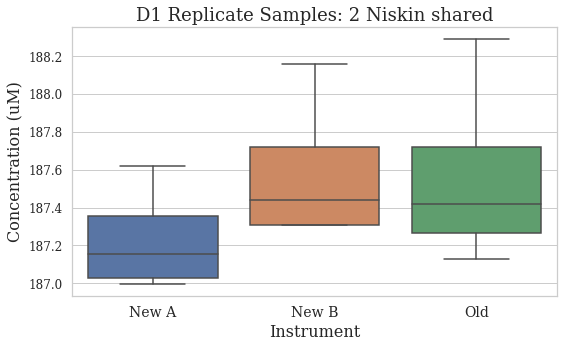

In [178]:
sns.boxplot(deep_reps_shared_df['Instrument'], deep_reps_shared_df['O2µmol/L'])

plt.xlabel("Instrument", fontsize=16)
plt.ylabel("Concentration (uM)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title('D1 Replicate Samples: 2 Niskin shared', fontsize=18)

plt.tight_layout()

# Comment or include next two lines if wanting to scale chart for all
#data_mean = deep_reps_shared_df['O2µmol/L'].mean()
#plt.ylim(data_mean-2, data_mean+2)

plt.savefig('replicate_deep_samples_1_shared.svg', format='svg')

---

## 1.3 Atmospheric Sample: All Instruments

In [30]:
atmospheric_all_df = pd.read_csv(r"C:\Users\she384\Documents\DO Commissioning\repo\data\atmospheric_diff_instruments.csv")

In [31]:
atmospheric_all_df.head()

,Instrument,Bottle,FlaskVol,RawTitre,Titre20,O2ml/L,ThioTemp,DrawTemp,EndVolts,TitreTime,O2µmol/L
0,New A,257,138.61,0.62271,0.62247,6.157,21.86,21.5,2.030,2101,274.8438
1,New A,260,140.86,0.63292,0.63285,6.158,20.50,21.5,2.009,2318,274.9331
2,New A,263,137.65,0.61726,0.61720,6.148,20.49,21.5,2.053,2617,274.4418
3,New A,266,142.77,0.64096,0.64089,6.152,20.48,21.5,2.017,2934,274.6205
4,New B,258,138.45,0.74709,0.74689,6.154,21.31,21.5,2.232,2951,274.8885


### Plot just initial box plot scaled to the measurements

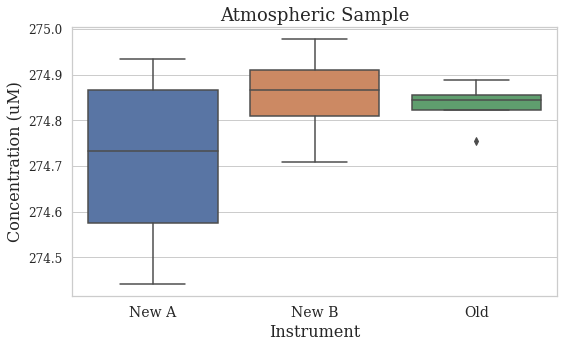

In [179]:
sns.boxplot(atmospheric_all_df['Instrument'], atmospheric_all_df['O2µmol/L'])

plt.xlabel("Instrument", fontsize=16)
plt.ylabel("Concentration (uM)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title('Atmospheric Sample', fontsize=18)

plt.tight_layout()

# Comment or include next two lines if wanting to scale chart for all
#data_mean = atmospheric_all_df['O2µmol/L'].mean()
#plt.ylim(data_mean-2, data_mean+2)

plt.savefig('atmospheric_diff_instruments.svg', format='svg')

### Plot with lines to indicate various QC limits

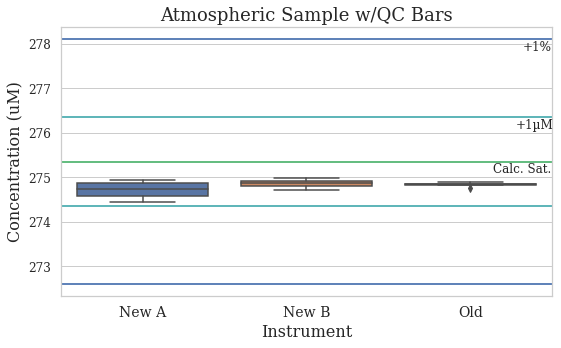

In [180]:
sns.boxplot(atmospheric_all_df['Instrument'], atmospheric_all_df['O2µmol/L'])

plt.xlabel("Instrument", fontsize=16)
plt.ylabel("Concentration (uM)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title('Atmospheric Sample w/QC Bars', fontsize=18)

# Calculate the theoretical saturation
MEASURED_SALINITY = 0
MEASURED_TEMPERATURE = 21.5
max_saturation = sw.satO2(MEASURED_SALINITY, MEASURED_TEMPERATURE)
max_saturation_mol = max_saturation * 44.66

max_saturation_mol_1pct = max_saturation_mol * 0.01

# Plot the calculated saturation as a line on the chart
plt.plot([-0.5, 2.5], [max_saturation_mol, max_saturation_mol], color="#32a858")

# Plot the 1% upper and lower lines
plt.plot([-0.5, 2.5], [max_saturation_mol-max_saturation_mol_1pct, max_saturation_mol-max_saturation_mol_1pct], color="#2c5aa3")
plt.plot([-0.5, 2.5], [max_saturation_mol+max_saturation_mol_1pct, max_saturation_mol+max_saturation_mol_1pct], color="#2c5aa3")

# Plot the +- 1uM upper and lower lines
plt.plot([-0.5, 2.5], [max_saturation_mol-1, max_saturation_mol-1], color="#2c9fa3")
plt.plot([-0.5, 2.5], [max_saturation_mol+1, max_saturation_mol+1], color="#2c9fa3")

# Plot the annotations
plt.annotate('+1µM', xy=(2.28, max_saturation_mol+1-0.25))
plt.annotate('+1%', xy=(2.32, max_saturation_mol+max_saturation_mol_1pct-0.25))
plt.annotate('Calc. Sat.', xy=(2.14, max_saturation_mol-0.25))

plt.tight_layout()

# Comment or include next two lines if wanting to scale chart for all
#data_mean = atmospheric_all_df['O2µmol/L'].mean()
#plt.ylim(data_mean-2, data_mean+2)

plt.savefig('atmospheric_diff_instruments_with_bars.svg', format='svg')

---

## 1.4 Atmospheric Sample: One Instrument

In [141]:
atmospheric_one_df = pd.read_csv(r"C:\Users\she384\Documents\DO Commissioning\repo\data\atmospheric_one_instrument.csv")

In [142]:
atmospheric_one_df.head()

,Instrument,Bottle,FlaskVol,RawTitre,Titre20,O2ml/L,ThioTemp,DrawTemp,EndVolts,TitreTime,O2µmol/L
0,New B,210,143.84,0.78354,0.78332,6.208,21.38,21.5,2.320,145535,277.3895
1,New B,211,144.58,0.78712,0.78686,6.204,21.60,21.5,2.327,145744,277.2108
2,New B,214,146.67,0.79938,0.79910,6.210,21.70,21.5,2.344,150012,277.4788
3,New B,216,144.35,0.78570,0.78541,6.203,21.77,21.5,2.306,150236,277.1662
4,New B,217,141.62,0.77087,0.77058,6.204,21.83,21.5,2.287,150440,277.2108


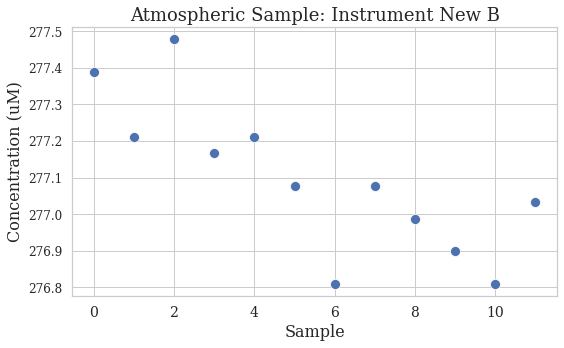

In [143]:
sns.lineplot(atmospheric_one_df.index, atmospheric_one_df['O2µmol/L'], lw=0, marker="o", ms=10)

plt.xlabel("Sample", fontsize=16)
plt.ylabel("Concentration (uM)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title('Atmospheric Sample: Instrument New B', fontsize=18)

plt.tight_layout()

plt.savefig('atmospheric_one_instrument.svg', format='svg')

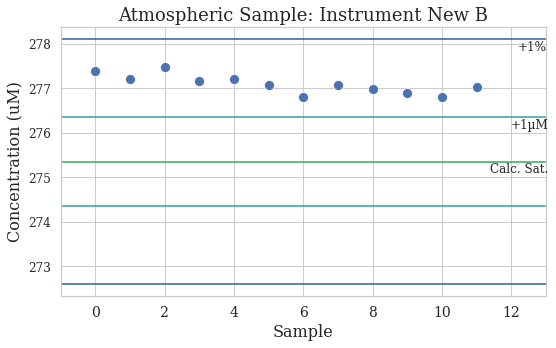

In [184]:
sns.lineplot(atmospheric_one_df.index, atmospheric_one_df['O2µmol/L'], lw=0, marker="o", ms=10)

plt.xlabel("Sample", fontsize=16)
plt.ylabel("Concentration (uM)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title('Atmospheric Sample: Instrument New B', fontsize=18)

plt.tight_layout()

# Calculate the theoretical saturation
MEASURED_SALINITY = 0
MEASURED_TEMPERATURE = 21.5
max_saturation = sw.satO2(MEASURED_SALINITY, MEASURED_TEMPERATURE)
max_saturation_mol = max_saturation * 44.66

max_saturation_mol_1pct = max_saturation_mol * 0.01

# Plot the calculated saturation as a line on the chart
plt.plot([-1, 13], [max_saturation_mol, max_saturation_mol], color="#32a858")

# Plot the 1% upper and lower lines
plt.plot([-1, 13], [max_saturation_mol-max_saturation_mol_1pct, max_saturation_mol-max_saturation_mol_1pct], color="#2c5aa3")
plt.plot([-1, 13], [max_saturation_mol+max_saturation_mol_1pct, max_saturation_mol+max_saturation_mol_1pct], color="#2c5aa3")

# Plot the +- 1uM upper and lower lines
plt.plot([-1, 13], [max_saturation_mol-1, max_saturation_mol-1], color="#2c9fa3")
plt.plot([-1, 13], [max_saturation_mol+1, max_saturation_mol+1], color="#2c9fa3")

# Plot the annotations
plt.annotate('+1µM', xy=(12, max_saturation_mol+1-0.25))
plt.annotate('+1%', xy=(12.18, max_saturation_mol+max_saturation_mol_1pct-0.25))
plt.annotate('Calc. Sat.', xy=(11.4, max_saturation_mol-0.25))

plt.xlim(-1, 13)

plt.savefig('atmospheric_one_instrument_with_bars.svg', format='svg')

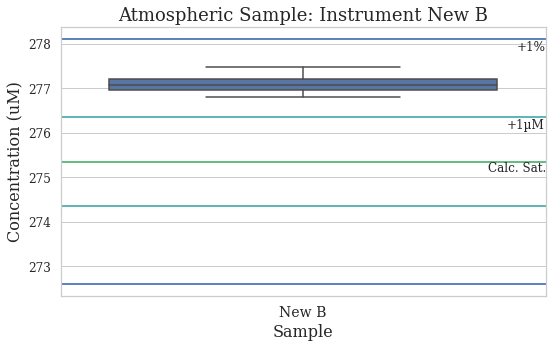

In [181]:
sns.boxplot(atmospheric_one_df['Instrument'], atmospheric_one_df['O2µmol/L'])

plt.xlabel("Sample", fontsize=16)
plt.ylabel("Concentration (uM)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title('Atmospheric Sample: Instrument New B', fontsize=18)

plt.tight_layout()

# Calculate the theoretical saturation
MEASURED_SALINITY = 0
MEASURED_TEMPERATURE = 21.5
max_saturation = sw.satO2(MEASURED_SALINITY, MEASURED_TEMPERATURE)
max_saturation_mol = max_saturation * 44.66

max_saturation_mol_1pct = max_saturation_mol * 0.01

# Plot the calculated saturation as a line on the chart
plt.plot([-0.5, 0.5], [max_saturation_mol, max_saturation_mol], color="#32a858")

# Plot the 1% upper and lower lines
plt.plot([-0.5, 0.5], [max_saturation_mol-max_saturation_mol_1pct, max_saturation_mol-max_saturation_mol_1pct], color="#2c5aa3")
plt.plot([-0.5, 0.5], [max_saturation_mol+max_saturation_mol_1pct, max_saturation_mol+max_saturation_mol_1pct], color="#2c5aa3")

# Plot the +- 1uM upper and lower lines
plt.plot([-0.5, 0.5], [max_saturation_mol-1, max_saturation_mol-1], color="#2c9fa3")
plt.plot([-0.5, 0.5], [max_saturation_mol+1, max_saturation_mol+1], color="#2c9fa3")

# Plot the annotations
plt.annotate('+1µM', xy=(0.42, max_saturation_mol+1-0.25))
plt.annotate('+1%', xy=(0.44, max_saturation_mol+max_saturation_mol_1pct-0.25))
plt.annotate('Calc. Sat.', xy=(0.38, max_saturation_mol-0.23))

# Comment or include next two lines if wanting to scale chart for all
#data_mean = atmospheric_one_df['O2µmol/L'].mean()
#plt.ylim(data_mean-2, data_mean+2)

plt.savefig('atmospheric_one_instrument_with_bars-boxplot-version.svg', format='svg')

---

## 1.5 Water Profile Comparison

In [101]:
profile_comparison_df = pd.read_csv(r"C:\Users\she384\Documents\DO Commissioning\repo\data\profile_comparison.csv")

In [102]:
profile_comparison_df.head()

,Instrument,Bottle,FlaskVol,RawTitre,Titre20,O2ml/L,ThioTemp,DrawTemp,EndVolts,TitreTime,O2µmol/L,RP,Pressure
0,New A,278,142.48,0.59621,0.59623,5.734,19.83,14.0,2.282,201954,255.9969,24,5
1,New A,276,140.04,0.58568,0.58551,5.730,21.38,14.1,2.276,202345,255.8182,23,5
2,New A,627,145.60,0.60911,0.60893,5.729,21.45,14.1,2.299,202606,255.7735,22,5
3,New A,625,143.75,0.60031,0.60012,5.720,21.51,13.9,2.292,203001,255.3716,21,40
4,New A,623,140.11,0.58475,0.58456,5.718,21.53,13.9,2.258,205345,255.2823,20,40


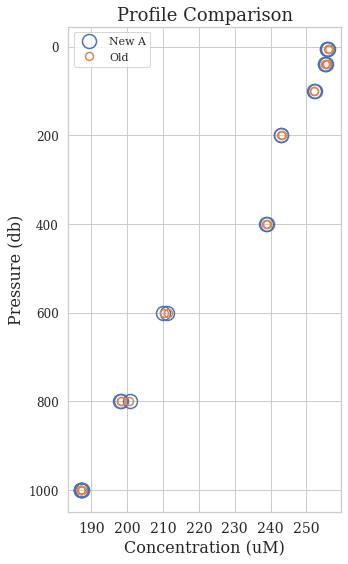

In [128]:
instrument_new_a_df = profile_comparison_df.loc[profile_comparison_df['Instrument'] == 'New A']
instrument_old_df = profile_comparison_df.loc[profile_comparison_df['Instrument'] == 'Old']

plt.plot(instrument_new_a_df['O2µmol/L'], instrument_new_a_df['Pressure'], lw=0, marker="o", ms=14, mfc="none", mew=1.5, label="New A")

plt.plot(instrument_old_df['O2µmol/L'], instrument_old_df['Pressure'], lw=0, marker=".", ms=16, mfc="none", mew=1.5, label="Old")

plt.xlabel("Concentration (uM)", fontsize=16)
plt.ylabel("Pressure (db)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title('Profile Comparison', fontsize=18)

plt.legend()

plt.gca().invert_yaxis()

fig = mpl.pyplot.gcf()
fig.set_size_inches(5, 8)

plt.tight_layout()

plt.savefig('profile_comparison.svg', format='svg')

### 1.5.1 T-Test Comparison of means

In [192]:
results_dict = {}
depths_to_test = [5, 40, 800, 1000]
for depth in depths_to_test:
    instrument_a_depth_subset = instrument_new_a_df.loc[instrument_new_a_df['Pressure'] == depth]
    instrument_old_depth_subset = instrument_old_df.loc[instrument_old_df['Pressure'] == depth]
    result = sci_st.ttest_ind(instrument_a_depth_subset['O2µmol/L'], instrument_old_depth_subset['O2µmol/L'])
    results_dict[depth] = result[1]

print("For the tested depths, the t-test p-value is shown")
for key in results_dict:
    print(f'At depth: {key} the p-value is: {results_dict[key]}')

For the tested depths, the t-test p-value is shown
At depth: 5 the p-value is: 0.10839798708992938
At depth: 40 the p-value is: 0.3026985172966608
At depth: 800 the p-value is: 0.9008494336784751
At depth: 1000 the p-value is: 0.8665430859682957


---

## 1.6 Repeated Deep Sample Measurements: 2

In [129]:
deep_reps_two_df = pd.read_csv(r"C:\Users\she384\Documents\DO Commissioning\repo\data\dep_2_deep_replicates.csv")

In [182]:
deep_reps_two_df.head()

,Instrument,Bottle,FlaskVol,RawTitre,Titre20,O2ml/L,ThioTemp,DrawTemp,EndVolts,TitreTime,O2µmol/L,RP
0,New A,675,135.77,0.41383,0.41379,4.174,20.46,6.3,2.085,5547,186.3257,2
1,New A,678,139.77,0.42626,0.42625,4.175,20.12,6.3,2.443,5948,186.4150,5
2,New A,681,141.76,0.43149,0.43148,4.166,20.18,6.5,2.452,10147,186.0131,8
3,New A,684,138.61,0.42143,0.42141,4.163,20.24,6.5,2.407,10343,185.8344,11
4,New A,687,141.65,0.43127,0.43125,4.167,20.27,6.5,2.439,10624,186.0577,14


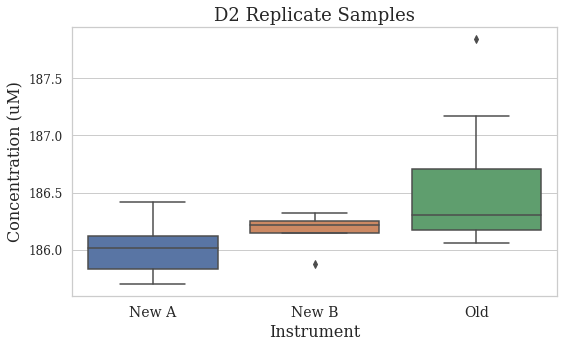

In [183]:
sns.boxplot(deep_reps_two_df['Instrument'], deep_reps_two_df['O2µmol/L'])

plt.xlabel("Instrument", fontsize=16)
plt.ylabel("Concentration (uM)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title('D2 Replicate Samples', fontsize=18)

plt.tight_layout()

# Comment or include next two lines if wanting to scale chart for all
#data_mean = deep_reps_two_df['O2µmol/L'].mean()
#plt.ylim(data_mean-2, data_mean+2)

plt.savefig('replicate_deep_samples_2.svg', format='svg')

### 1.6.1 T-Test Comparison of Means

In [193]:
deep_reps_two_newa = deep_reps_two_df.loc[deep_reps_two_df['Instrument'] == 'New A']
deep_reps_two_newb = deep_reps_two_df.loc[deep_reps_two_df['Instrument'] == 'New B']
deep_reps_two_old = deep_reps_two_df.loc[deep_reps_two_df['Instrument'] == 'Old']

#### Compare New A to the Old instrument

In [195]:
result = sci_st.ttest_ind(deep_reps_two_newa['O2µmol/L'], deep_reps_two_old['O2µmol/L'])
print(f'Comparison of the New A instrument to Old, p-value: {result[1]}')
if result[1] < 0.05:
    print('Significance !')

Comparison of the New A instrument to Old, p-value: 0.039304940051647204
Significance !


#### Compare New B to Old instrument

In [196]:
result = sci_st.ttest_ind(deep_reps_two_newb['O2µmol/L'], deep_reps_two_old['O2µmol/L'])
print(f'Comparison of the New B instrument to Old, p-value: {result[1]}')
if result[1] < 0.05:
    print('Significance !')

Comparison of the New B instrument to Old, p-value: 0.11189671028378533
